# Since the original database is compressed by default, we extract it first

In [1]:
import tarfile

In [2]:
with tarfile.open('./datasets/arq_dataset.tar.gz') as file:
    file.extractall('./datasets/')
    file.close()

# We now load the data and generate the respective masks

In [3]:
import numpy as np

In [4]:
dataset = np.load('./datasets/custom_arq_dataset.npy', allow_pickle=True).item()

KEYWORD = 'arq'

mask_tr = np.array(dataset['train']['labels']) == KEYWORD
mask_ts = np.array(dataset['test']['labels']) == KEYWORD

model_tr = dataset['train']['data'][mask_tr]
model_ts = dataset['test']['data'][mask_ts]

In [13]:
model_tr.shape

(932, 32, 32, 32)

In [14]:
model_ts.shape

(219, 32, 32, 32)

# We use an already made function to fracture any models

In [6]:
from utils.data_prep import get_fractured

In [7]:
train_x, train_y = [], []
for model in model_tr:
    fract = get_fractured(model)
    train_x.append(fract)
    train_y.append(model & ~fract)
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x, test_y = [], []
for model in model_ts:
    fract = get_fractured(model)
    test_x.append(fract)
    test_y.append(model & ~fract)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Once preprocessed, we save all the data

In [8]:
np.save('./datasets/dataset.npy', {
    'train': {
        'x': train_x,
        'y': train_y
    },
    'test': {
        'x': test_x,
        'y': test_y
    }
})

# Now, we display a random object in one of the lists

In [10]:
import matplotlib.pyplot as plt

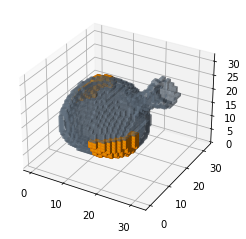

In [11]:
index = np.random.randint(0, len(train_x)-1)
mesh_fract = train_x[index]
mesh_piece = train_y[index]

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(mesh_fract, facecolors='slategray', alpha=0.5)
ax.voxels(mesh_piece, facecolors='orange', edgecolors='darkorange')
plt.show()